In [11]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
import re

In [3]:
upsampled_input_cc_types_df = pd.read_csv("../upsampled_train_val_test/train_no_charade.csv")
val_cc_types_df = pd.read_csv("../upsampled_train_val_test/val_no_charade.csv")
test_cc_types_df = pd.read_csv("../upsampled_train_val_test/test_no_charade.csv")

In [6]:
input_bow = tokenizer.texts_to_matrix(upsampled_input_cc_types_df['clue'])

In [9]:
def addSpaceBeforePunct(s):
    s = re.sub('([.,!?()])', r' \1 ', s)
    s = re.sub('\s{2,}', ' ', s)
    return s

In [14]:
upsampled_input_cc_types_df['clue'] = upsampled_input_cc_types_df['clue'].apply(addSpaceBeforePunct)
val_cc_types_df['clue'] = val_cc_types_df['clue'].apply(addSpaceBeforePunct)
test_cc_types_df['clue'] = test_cc_types_df['clue'].apply(addSpaceBeforePunct)

In [50]:
tokenizer = Tokenizer(filters='"#$%&()*+/:;<=>?@[\]^_`{|}~')#exclude ! . , -
tokenizer.fit_on_texts(pd.concat([upsampled_input_cc_types_df,val_cc_types_df,test_cc_types_df])['clue'])

In [57]:
inputs_X = tokenizer.texts_to_matrix(upsampled_input_cc_types_df['clue'])
val_X = tokenizer.texts_to_matrix(val_cc_types_df['clue'])
test_X = tokenizer.texts_to_matrix(test_cc_types_df['clue'])

In [58]:
cc_types = 'is_anagram	is_homophone	is_double	is_cryptic	is_contain	is_reverse	is_alternate	is_init	is_delete	is_&lit	is_hidden	is_spoonerism	is_palindrome'.split('	')

In [60]:
cc_types_dict = {k: v for v, k in enumerate(cc_types)}

In [65]:
inputs_Y = [cc_types_dict[val] for val in upsampled_input_cc_types_df['category'].values]
val_Y = [cc_types_dict[val] for val in val_cc_types_df['category'].values]
test_Y = [cc_types_dict[val] for val in test_cc_types_df['category'].values]

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [56]:
gnb = GaussianNB()

In [66]:
gnb.fit(inputs_X,inputs_Y)

GaussianNB(priors=None)

In [67]:
gnb.score(val_X,val_Y)

0.30661089810619263

In [68]:
val_pred = gnb.predict(val_X)

In [70]:
cnf_matrix = confusion_matrix(val_Y,val_pred)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[ 486  115    3  195  495  374   12  209  335    3  183    1    0]
 [  85   44    2   22  130   24    6    8   44    0   13    1    0]
 [   6   13    1   15   19    9    2   11   12    1    7    0    4]
 [  17   55   62   80   94   34   29   32  117    4   44    3    4]
 [  36  116    0   50 1119  121    0   14   50    0  131    0    0]
 [ 160   47    1    8   43  163    0   36   41    1  214    0    0]
 [   0    0    0    0    0    0  129    0    0    0    0    0    0]
 [  63    4    3    7   36    7    0   32   24    0    5    0    0]
 [  98   82    0  132  547  290    0  162  533   10   74    1    0]
 [   1    1    0    5   10    2    0    4    7    0    3    0    0]
 [ 121    4    5   12  112   83    6   32   58    1   51    2    1]
 [   0    1    0    0    0    0    0    1   18    0    1    1    0]
 [   1    1    0    2    0    3    0    1    0    0    1    0    0]]
Normalized

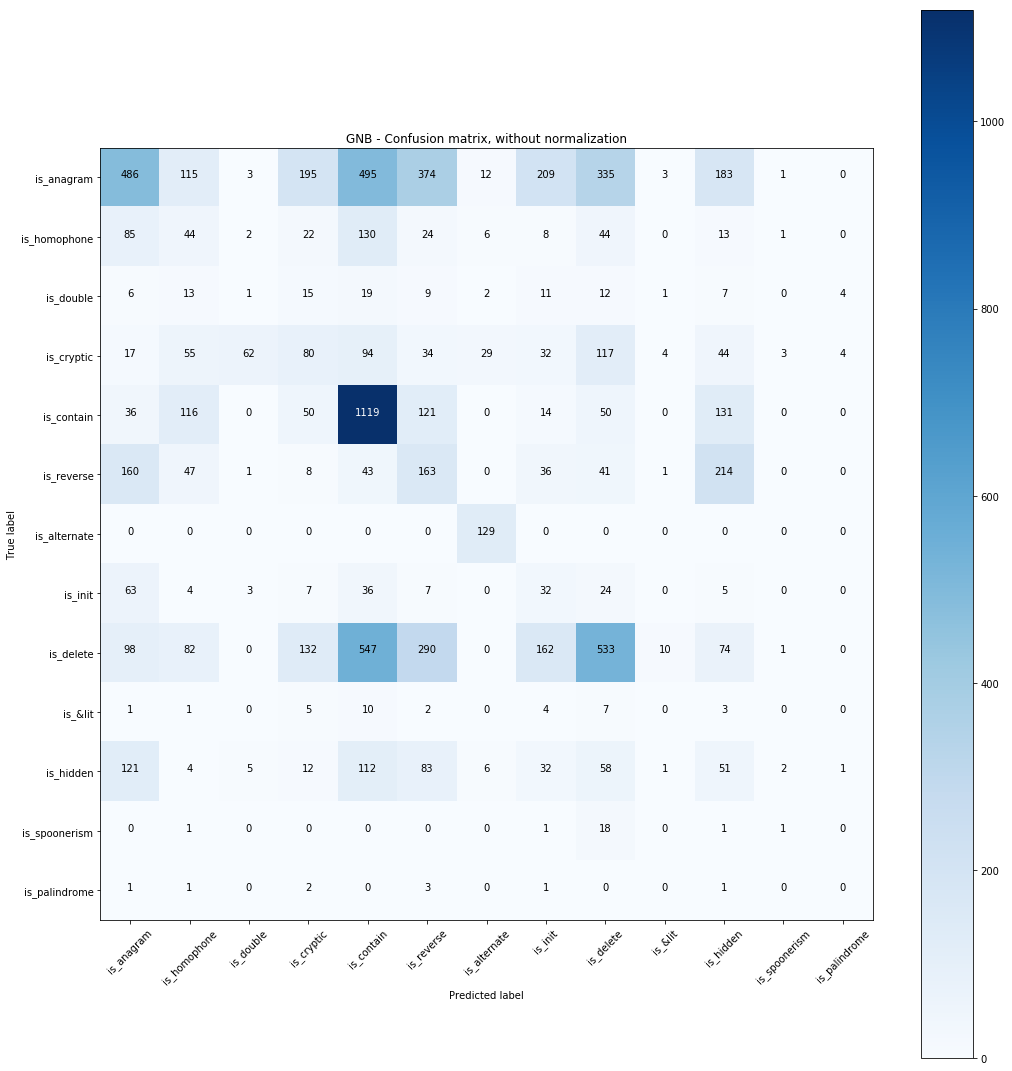

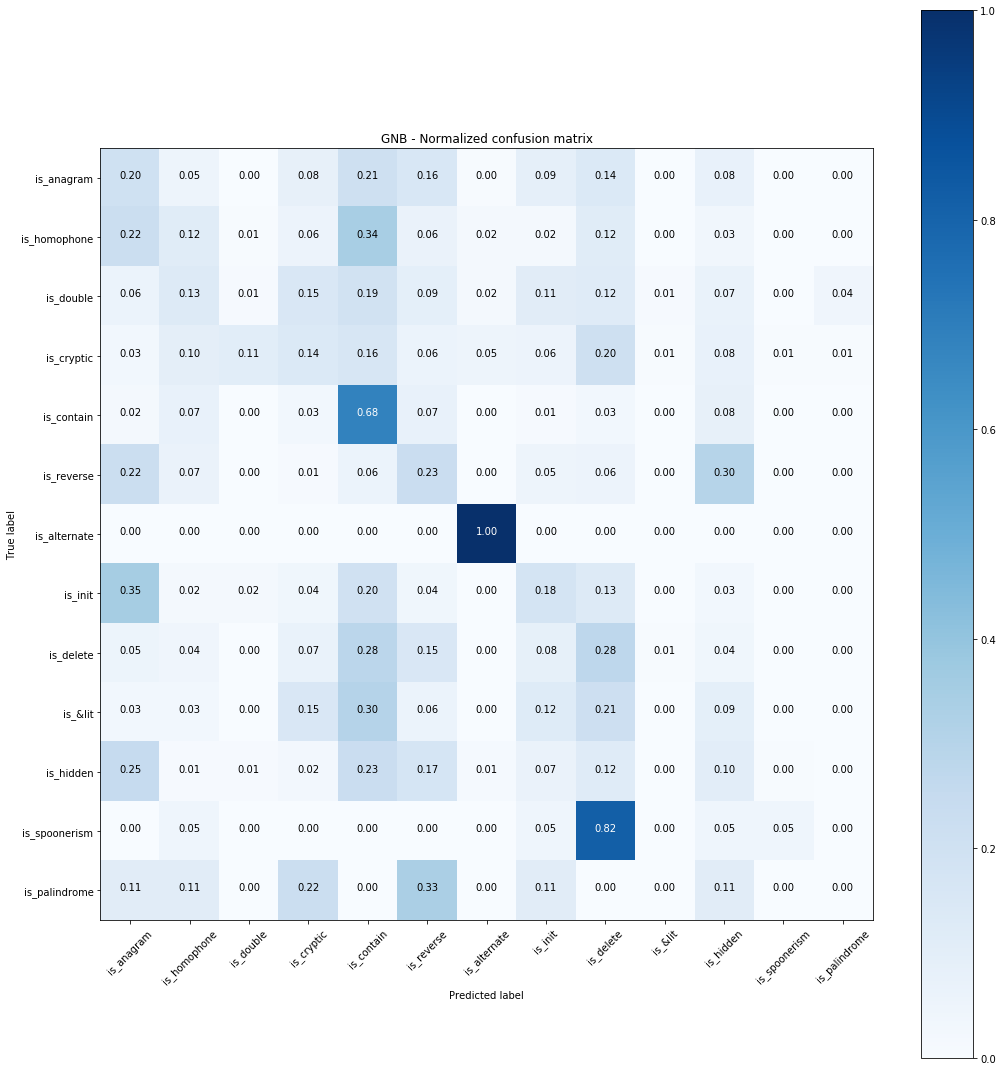

In [72]:
print(__doc__)

import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

matplotlib.matplotlib_fname()

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
np.set_printoptions(precision=2)
class_names = cc_types
# Plot non-normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='GNB - Confusion matrix, without normalization')

plt.savefig("naive_bayes_unnormalized")
# Plot normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='GNB - Normalized confusion matrix')

plt.savefig("naive_bayes_normalized")